# 🧩 Feature Engineering

Now that we've explored and understood our data in the previous EDA notebook, the next step is to **prepare the dataset for modeling**.

In this phase, we’ll:
- Handle class imbalance
- Split the data into training and testing sets
- Scale numerical features (since PCA components and `Amount` vary in magnitude)
- Prepare clean, ready-to-train datasets

---

### 🎯 Objective
Ensure all features are on comparable scales and that the model sees a balanced, well-prepared dataset to learn effectively.


In [3]:
# Basic setup
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (ensure the path matches your data location)
df = pd.read_csv("../data/processed/cleaned_creditcard.csv")

# Quick sanity check
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556


## 🪓 Train-Test Split

We'll split the dataset into **training (80%)** and **testing (20%)** sets.

This ensures we evaluate the model on unseen data later.
We'll also perform a **stratified split** to maintain the same fraud vs. non-fraud ratio in both sets.


In [4]:
# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

In [5]:
# Stratified split to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")
print(f"Fraud ratio in training: {y_train.mean():.4f}")
print(f"Fraud ratio in testing: {y_test.mean():.4f}")

Training shape: (227845, 31)
Testing shape: (56962, 31)
Fraud ratio in training: 0.0017
Fraud ratio in testing: 0.0017


## ⚖️  Feature Scaling

Because our dataset includes:
- **PCA features (`V1–V28`)** — already normalized to some extent, and
- **`Time` and `Amount`** — which vary in scale,

we’ll apply **StandardScaler** to ensure consistent feature magnitudes across all columns.


In [7]:
# Initialize the scaler
scaler = StandardScaler()

In [8]:
# Identify numeric columns
num_cols = X_train.columns

In [9]:
# Fit on training data and transform both train and test sets
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=num_cols)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=num_cols)

In [10]:
# Preview
X_train_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
0,1.411588,0.993379,-0.456037,-0.894052,-0.467284,1.089217,3.024383,-1.194852,0.957057,1.281376,...,0.103171,0.409563,0.490685,1.141970,-0.670832,-0.807227,0.191912,-0.099106,-0.322494,1.101728
1,0.623141,1.038507,-0.029349,-2.018302,0.175133,2.133506,2.478840,-0.001832,0.566704,0.041121,...,0.052055,0.314019,0.056568,1.168583,0.985238,-0.977976,0.006397,-0.211524,-0.339764,-0.678651
2,-1.130680,-0.506766,0.366065,0.470114,-0.700918,-0.598748,1.470411,-1.786684,-4.227592,0.000064,...,-3.807987,0.150500,-0.695838,-1.540549,1.587269,1.895777,0.094137,0.566426,0.346693,-0.530579
3,0.794699,1.166419,-0.909447,-0.493095,-1.178149,-1.010692,-0.262292,-1.153123,0.008765,-1.019866,...,-0.190540,0.105701,0.331932,-0.888718,-0.532153,-0.336546,0.044738,-0.193183,-0.327360,-0.291259
4,-0.748102,-0.229485,-0.613041,0.076742,-2.440089,0.518711,-0.109914,0.407186,-0.095161,-0.041449,...,-0.331467,-0.239208,-0.010747,-2.250223,-0.559400,-0.300345,-0.080285,-0.196818,-0.008281,0.333315


## ✅  Summary

We have:
- Split the dataset into train and test sets (80/20)
- Applied standard scaling to normalize feature magnitudes

Our data is now ready for the next phase — **handling class imbalance** and **model training**.

Next: Class Balancing (using SMOTE)


# ⚖️ Handling Class Imbalance

Fraud detection datasets are notoriously imbalanced — genuine transactions vastly outnumber fraudulent ones.

If not addressed, models tend to **ignore the minority class (fraud)** and achieve deceptively high accuracy while performing poorly at catching actual frauds.

In this step, we will:
- Examine the imbalance in our training set
- Apply sampling techniques to handle it:
  - **Undersampling** the majority class
  - **Oversampling** the minority class
  - **SMOTE (Synthetic Minority Oversampling Technique)** — generates synthetic samples of the minority class

We'll compare their effects and use the balanced data for model training later.


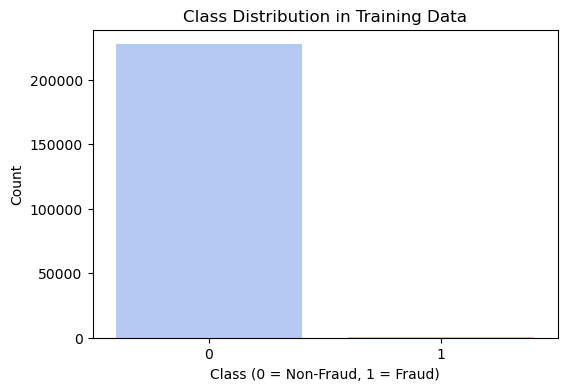

In [11]:
# Visualize imbalance in the training set
plt.figure(figsize=(6,4))
sns.countplot(x=y_train, palette='coolwarm')
plt.title("Class Distribution in Training Data")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

In [12]:
# Display ratios
fraud_ratio = y_train.mean() * 100
print(f"Fraud cases in training data: {fraud_ratio:.4f}%")

Fraud cases in training data: 0.1729%


## 🔹 Random Undersampling

We'll reduce the number of majority class (non-fraud) samples so that it matches the minority class count.

⚠️ While this balances the data, it also discards a large portion of legitimate samples — which can lead to loss of information.


In [13]:
from sklearn.utils import resample

In [14]:
# Combine X and y for easy manipulation
train_data = pd.concat([X_train_scaled, y_train.reset_index(drop=True)], axis=1)

In [15]:
# Separate majority and minority classes
majority = train_data[train_data.Class == 0]
minority = train_data[train_data.Class == 1]

In [16]:
# Downsample majority class
majority_downsampled = resample(majority,
                                replace=False,
                                n_samples=len(minority),
                                random_state=42)

In [17]:
# Combine minority with downsampled majority
train_undersampled = pd.concat([majority_downsampled, minority])

In [18]:
# Shuffle the dataset
train_undersampled = train_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [19]:
# Split back into X and y
X_train_under = train_undersampled.drop('Class', axis=1)
y_train_under = train_undersampled['Class']

In [20]:
print(f"Balanced training set shape: {X_train_under.shape}")
print(y_train_under.value_counts())

Balanced training set shape: (788, 31)
1    394
0    394
Name: Class, dtype: int64


## 🔹 Random Oversampling

Here, we duplicate samples from the minority class until both classes have equal representation.

This avoids losing data but may cause **overfitting**, since the same fraud examples are repeated.


In [21]:
# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

train_oversampled = pd.concat([majority, minority_upsampled])

In [22]:
# Shuffle
train_oversampled = train_oversampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [23]:
# Split back into X and y
X_train_over = train_oversampled.drop('Class', axis=1)
y_train_over = train_oversampled['Class']

In [24]:
print(f"Balanced training set shape: {X_train_over.shape}")
print(y_train_over.value_counts())

Balanced training set shape: (454902, 31)
0    227451
1    227451
Name: Class, dtype: int64


## 🔹 SMOTE (Synthetic Minority Oversampling Technique)

SMOTE creates **synthetic** samples of the minority class by interpolating between existing ones.

This helps the model generalize better than simply duplicating examples.

In [25]:
from imblearn.over_sampling import SMOTE
import sklearn, imblearn
print("scikit-learn:", sklearn.__version__)
print("imbalanced-learn:", imblearn.__version__)

scikit-learn: 1.3.2
imbalanced-learn: 0.11.0


In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("After SMOTE:")
print(y_train_smote.value_counts())

After SMOTE:
0    227451
1    227451
Name: Class, dtype: int64


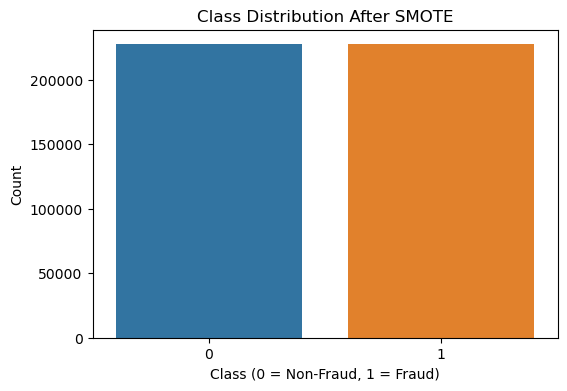

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_smote)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

## ✅ Summary

We addressed class imbalance using three techniques:
1. **Undersampling** — removes some majority samples (risk of losing data)
2. **Oversampling** — duplicates minority samples (risk of overfitting)
3. **SMOTE** — generates synthetic minority samples (balanced approach)

We'll use the **SMOTE-balanced dataset** (`X_train_smote`, `y_train_smote`) going forward for model training.

---

📘 Next Notebook → `03_Model_Training.ipynb`
We'll now train and evaluate multiple models (Logistic Regression, Random Forest, XGBoost, etc.) using this balanced dataset.


In [32]:
import os
import pandas as pd

# Define correct path from notebooks directory
save_path = "../data/preprocessed"

# Create folder if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Save original train/test splits
X_train.to_csv(f"{save_path}/X_train_original.csv", index=False)
X_test.to_csv(f"{save_path}/X_test.csv", index=False)
y_train.to_csv(f"{save_path}/y_train_original.csv", index=False)
y_test.to_csv(f"{save_path}/y_test.csv", index=False)

# Save SMOTE-resampled training data
X_train_smote.to_csv(f"{save_path}/X_train_smote.csv", index=False)
y_train_smote.to_csv(f"{save_path}/y_train_smote.csv", index=False)

print("✅ All preprocessed data saved successfully in 'data/preprocessed/' folder (outside notebooks).")

✅ All preprocessed data saved successfully in 'data/preprocessed/' folder (outside notebooks).


## 📦 Saving Preprocessed Data

Now that we've completed data preprocessing and applied SMOTE to handle class imbalance, we'll save the processed datasets for reuse in subsequent steps (Model Training and Explainability).  

This ensures:
- Reproducibility — we can reload the same data anytime without repeating preprocessing.
- Organized project structure — all processed data is stored inside the `data/preprocessed/` directory (outside of the notebooks folder).

We'll save:
- Original training and test splits (`X_train_original`, `y_train_original`, `X_test`, `y_test`)
- SMOTE-resampled training sets (`X_train_smote`, `y_train_smote`)
